# Function Transformer

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [56]:
df = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head(3)

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875


In [58]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [60]:
df['Age'].fillna(df["Age"].mean(),inplace=True)
df['Fare'].fillna(df["Fare"].mean(),inplace=True)

C:\Users\amaan\AppData\Local\Temp\ipykernel_13048\3875669359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df["Age"].mean(),inplace=True)
C:\Users\amaan\AppData\Local\Temp\ipykernel_13048\3875669359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [62]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

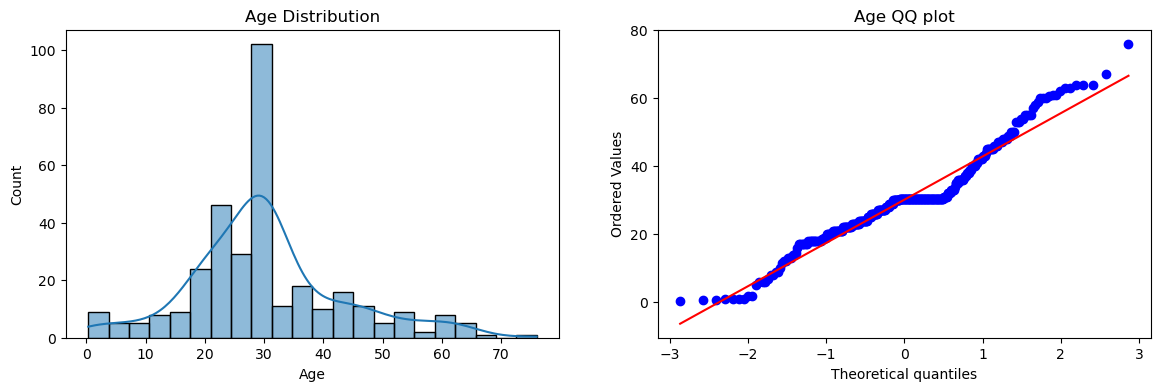

In [66]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'],kde=True)
plt.title('Age Distribution')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

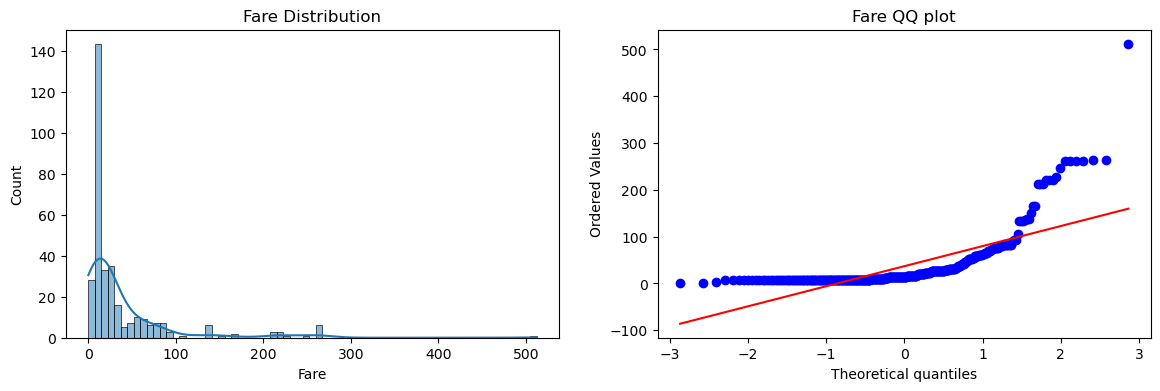

In [67]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare Distribution')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [68]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)

print(f"Accuracy LR: {accuracy_score(y_test,y_pred_lr)}")
print(f"Accuracy DT: {accuracy_score(y_test,y_pred_dt)}")

Accuracy LR: 0.6071428571428571
Accuracy DT: 0.5357142857142857


In [69]:
trf = FunctionTransformer(func=np.log1p)
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [71]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
lr.fit(x_train_transformed,y_train)
dt.fit(x_train_transformed,y_train)

y_pred_lr = lr.predict(x_test_transformed)
y_pred_dt = dt.predict(x_test_transformed)

print(f"Accuracy LR: {accuracy_score(y_test,y_pred_lr)}")
print(f"Accuracy DT: {accuracy_score(y_test,y_pred_dt)}")

Accuracy LR: 0.6190476190476191
Accuracy DT: 0.5714285714285714


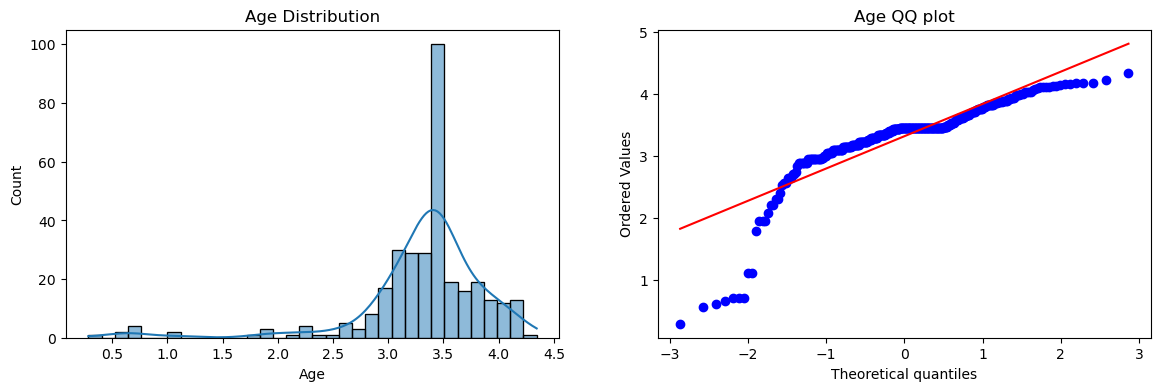

In [82]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train_transformed['Age'],kde=True)
plt.title('Age Distribution')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

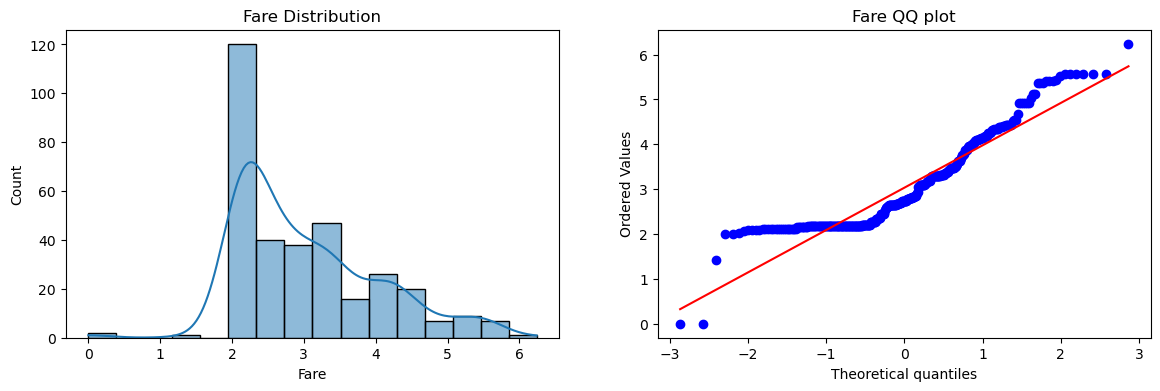

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train_transformed['Fare'],kde=True)
plt.title('Fare Distribution')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')
plt.show()